In [130]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [235]:
# Read Train and Test dataset (updated to new first-1000-row files)
data_train = pd.read_csv('/Users/nikunj/Documents/DTU/Year-3/Sem-5/ML-Lab(Sem-5)/ML-Project/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Users/nikunj/Documents/DTU/Year-3/Sem-5/ML-Lab(Sem-5)/ML-Project/CSV Files/Training and Testing Sets/UNSW_NB15_testing-set.csv')

In [191]:
# Check data
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [192]:
columns = [
    'id','dur','proto','service','state','spkts','dpkts','sbytes','dbytes','rate',
    'sttl','dttl','sload','dload','sloss','dloss','sinpkt','dinpkt','sjit','djit',
    'swin','stcpb','dtcpb','dwin','tcprtt','synack','ackdat','smean','dmean','trans_depth',
    'response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm',
    'ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd','ct_flw_http_mthd',
    'ct_src_ltm','ct_srv_dst','is_sm_ips_ports','attack_cat','label'
]


In [193]:
# Assign name for columns
data_train.columns = columns

In [194]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [195]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [196]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8844.843836,14928.918564,95406.187105,179.546997,79.609567,73454033.194063,671205.574188,4.953000,6.948010,985.976864,88.216296,4976.254226,604.353826,116.257339,969250421.910511,968877027.071153,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2144.291655,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,174765.644309,143654.217718,165400.978457,102.940011,110.506863,188357447.000203,2421312.388757,66.005059,52.732999,7242.245841,987.093195,44965.846519,4061.043281,127.001024,1355264249.263036,1353999546.225652,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,54207.967294,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,13053.338870,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,879674.750000,1447.022705,0.000000,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,88888888.000000,27844.871090,3.000000,2.000000,55.156896,51.053000,2513.295019,114.990625,255.000000,1916651334.000000,1913674673.000000,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,12965233.000000,14655550.000000,1000000.003000,255.000000,254.000000,5988000256.000000,22422730.000000,4803.000000,5484.000000,84371.496000,56716.824000,1460480.016000,289388.269700,255.000000,4294958913.000000,4294881924.000000,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6558056.000000,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [197]:
def ensure_outcome(df: pd.DataFrame) -> pd.DataFrame:
    """Ensure UNSW-NB15-style DataFrame has an 'outcome' column ('normal' or 'attack')."""
    if 'outcome' in df.columns:
        return df
    
    if 'label' in df.columns:
        df['outcome'] = pd.to_numeric(df['label'], errors='coerce').fillna(0).astype(int) \
                            .map({0: 'normal', 1: 'attack'})
    elif 'attack_cat' in df.columns:
        df['outcome'] = df['attack_cat'].astype(str).str.lower().ne('normal') \
                            .map({False: 'normal', True: 'attack'})
    else:
        raise KeyError("Could not derive 'outcome': need 'label' or 'attack_cat'.")
    
    return df

data_train = ensure_outcome(data_train)
data_test  = ensure_outcome(data_test)


In [198]:
def pie_plot(df, cols_list, rows=1, cols=1, top_n=5):
    """
    Draws pie charts for categorical columns in a DataFrame.
    - Shows only top_n categories; others are grouped as 'Others'.
    - Handles large category counts and flexible subplot layouts.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    axes = axes.ravel() if rows * cols > 1 else [axes]
    
    for ax, col in zip(axes, cols_list):
        counts = df[col].value_counts()
        
        # Group small categories into 'Others'
        if len(counts) > top_n:
            top_counts = counts.nlargest(top_n)
            others_sum = counts.iloc[top_n:].sum()
            top_counts['Others'] = others_sum
        else:
            top_counts = counts
        
        # Plot pie chart
        top_counts.plot(
            ax=ax,
            kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 9}
        )
        ax.set_title(str(col), fontsize=12)
        ax.set_ylabel("")  # hide default y-label
        ax.axis('equal')   # ensure circle shape
    
    # Hide any unused axes
    for ax in axes[len(cols_list):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

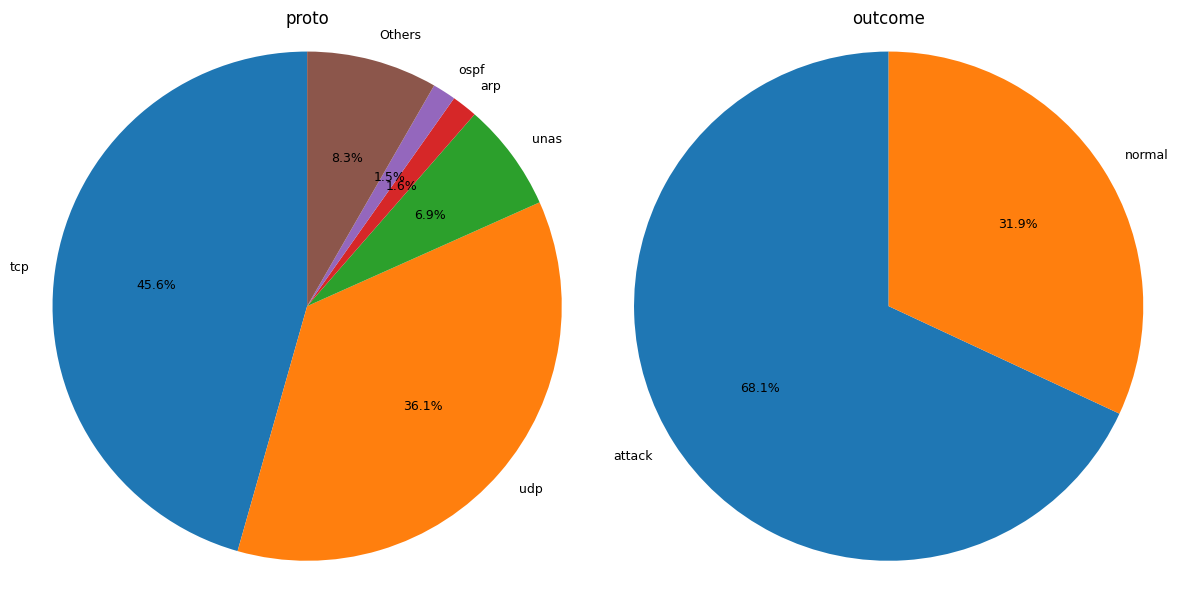

In [199]:
pie_plot(data_train, ['proto', 'outcome'], 1, 2)

In [294]:
def ensure_binary_outcome(df: pd.DataFrame) -> pd.DataFrame:
    """
    Ensures 'outcome' exists and is binary (0 = normal, 1 = attack).
    """
    df = df.copy()
    if 'outcome' in df.columns:
        return df
    if 'label' in df.columns:
        df['outcome'] = pd.to_numeric(df['label'], errors='coerce').fillna(0).astype(int)
    elif 'attack_cat' in df.columns:
        df['outcome'] = (df['attack_cat'].astype(str).str.lower() != 'normal').astype(int)
    else:
        raise ValueError("No 'label' or 'attack_cat' column found.")
    return df

def scale_numeric(df_num: pd.DataFrame, scaler=None):
    """Scales numeric columns using RobustScaler."""
    if scaler is None:
        scaler = RobustScaler()
        scaled = scaler.fit_transform(df_num)
    else:
        scaled = scaler.transform(df_num)
    return pd.DataFrame(scaled, columns=df_num.columns, index=df_num.index), scaler

def preprocess(df: pd.DataFrame, scaler=None, reference_columns=None):
    """
    Full preprocessing pipeline
    """
    df = ensure_binary_outcome(df)
    df = df.drop(columns=['id', 'label', 'attack_cat'], errors='ignore')
    cat_cols = [c for c in ['proto', 'service', 'state'] if c in df.columns]
    num_cols = df.select_dtypes(include=['number']).columns.difference(['outcome'])
    # Scale numeric features
    if not num_cols.empty:
        df[num_cols], scaler = scale_numeric(df[num_cols], scaler)
    # One-hot encode
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    # Align columns if reference provided
    if reference_columns is not None:
        df = df.reindex(columns=reference_columns, fill_value=0)
    return df, scaler

# Preprocess train and test
scaled_train, scaler = preprocess(data_train)
scaled_test, _ = preprocess(data_test, scaler=scaler, reference_columns=scaled_train.columns)

# Extract features and labels
x_train = scaled_train.drop(['outcome'], axis=1).values
y_train = scaled_train['outcome'].values
x_test = scaled_test.drop(['outcome'], axis=1).values
y_test = scaled_test['outcome'].values

# Apply PCA
pca = PCA(n_components=20)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

# Print shapes to verify
print(f"Original training shape: {x_train.shape}")
print(f"PCA training shape: {x_train_reduced.shape}")
print(f"Original test shape: {x_test.shape}")
print(f"PCA test shape: {x_test_reduced.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Original training shape: (175341, 194)
PCA training shape: (175341, 20)
Original test shape: (82332, 194)
PCA test shape: (82332, 20)
Training labels shape: (175341,)
Test labels shape: (82332,)


In [237]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression 88.09291608922042  Test Accuracy Logistic Regression 74.12306272166352
Training Precesion Logistic Regression 87.68226316313175  Test Precesion Logistic Regression 69.2490105910817
Training Recall Logistic Regression 95.99048105847949  Test Recall Logistic Regression 95.33883349510279


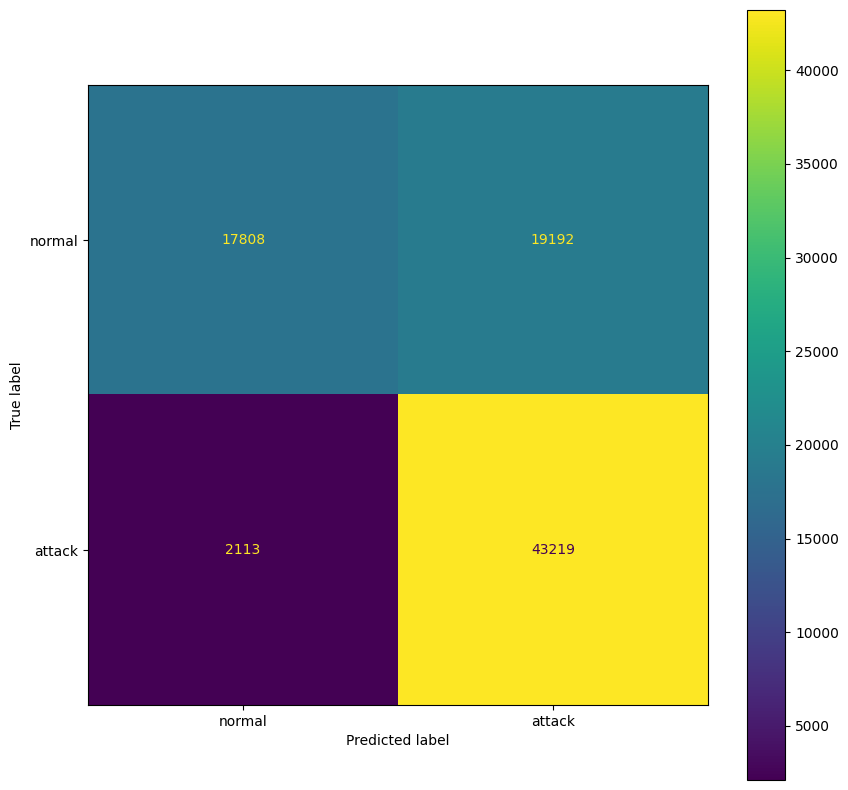

In [250]:
lr = LogisticRegression(C=0.01, max_iter=1000).fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifier 94.90934807033152  Test Accuracy KNeighborsClassifier 85.70422193071953
Training Precesion KNeighborsClassifier 95.58421613230837  Test Precesion KNeighborsClassifier 81.2320863577145
Training Recall KNeighborsClassifier 97.0018685950344  Test Recall KNeighborsClassifier 96.28077296391069


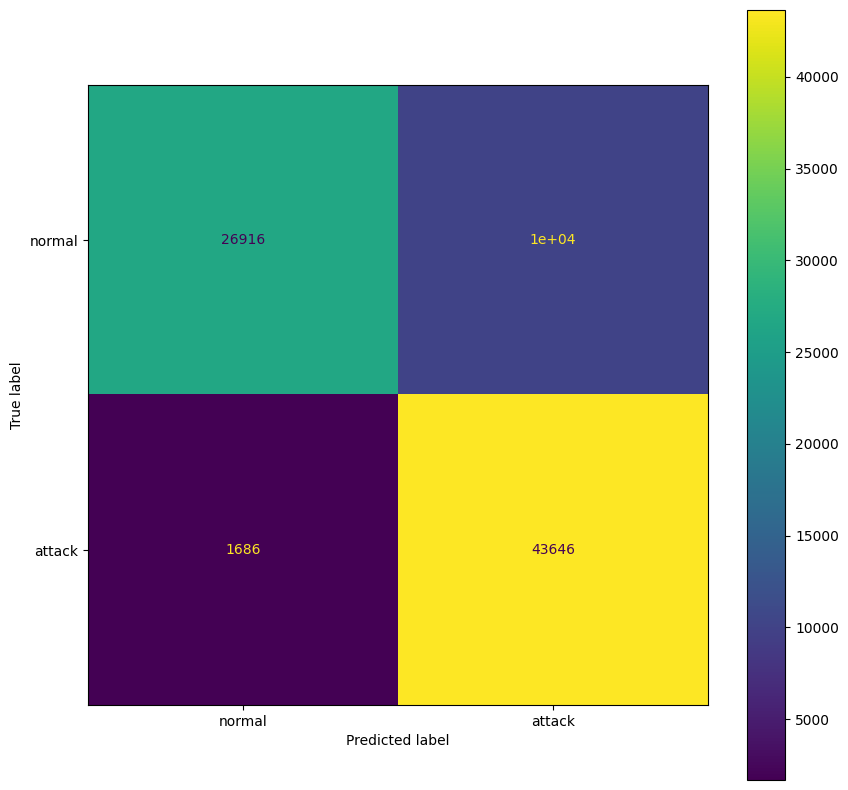

In [251]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy GaussianNB 75.30469200015969  Test Accuracy GaussianNB 73.97002380605355
Training Precesion GaussianNB 91.66210085691118  Test Precesion GaussianNB 80.12250144934842
Training Recall GaussianNB 70.09242422972825  Test Recall GaussianNB 70.12044471896233


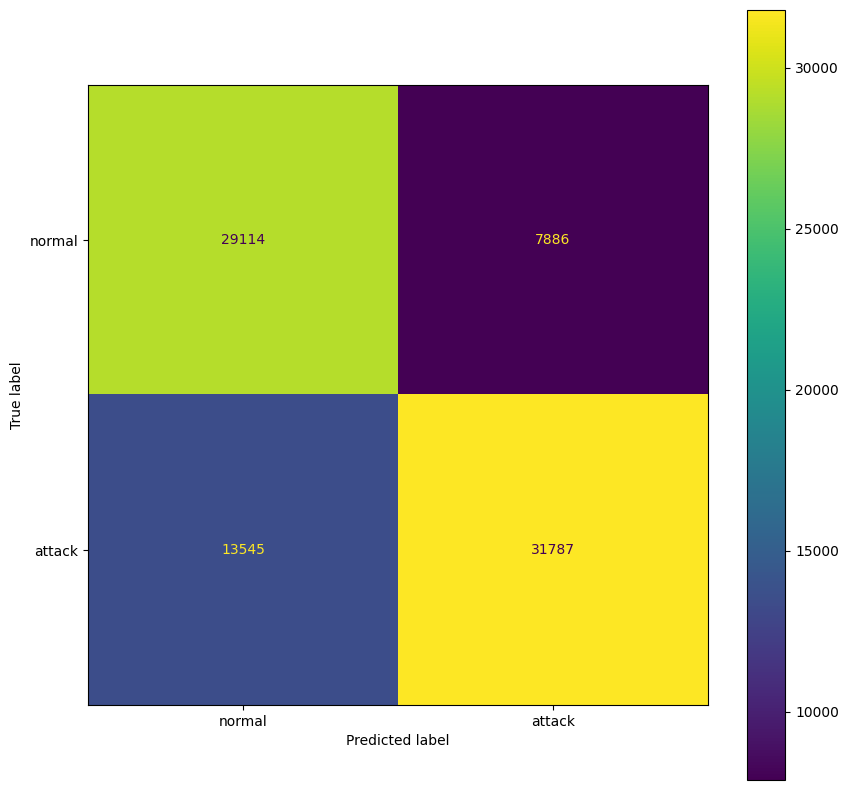

In [252]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

Training Accuracy Linear SVC(LBasedImpl) 90.42779498234869  Test Accuracy Linear SVC(LBasedImpl) 81.66326580187533
Training Precesion Linear SVC(LBasedImpl) 92.0387935628264  Test Precesion Linear SVC(LBasedImpl) 77.19904283838002
Training Recall Linear SVC(LBasedImpl) 94.07328579448806  Test Recall Linear SVC(LBasedImpl) 94.652783905409


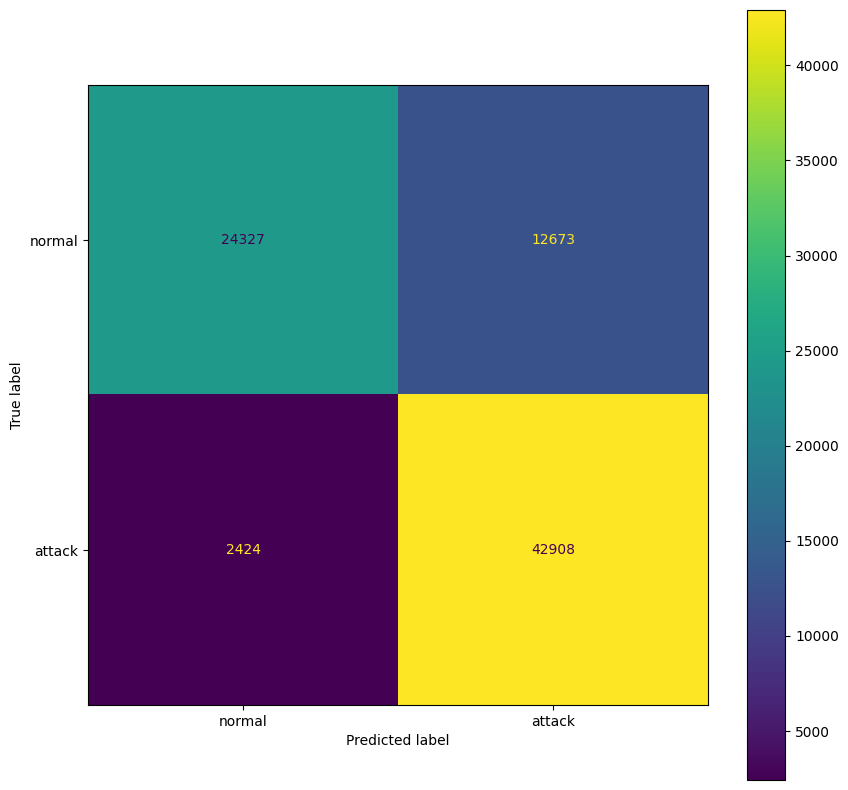

In [253]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 99.81692815713382  Test Accuracy DecisionTreeClassifier 86.42083272603604
Training Precesion DecisionTreeClassifier 99.88850326107004  Test Precesion DecisionTreeClassifier 82.5021888918497
Training Recall DecisionTreeClassifier 99.8424682213154  Test Recall DecisionTreeClassifier 95.61678284655432


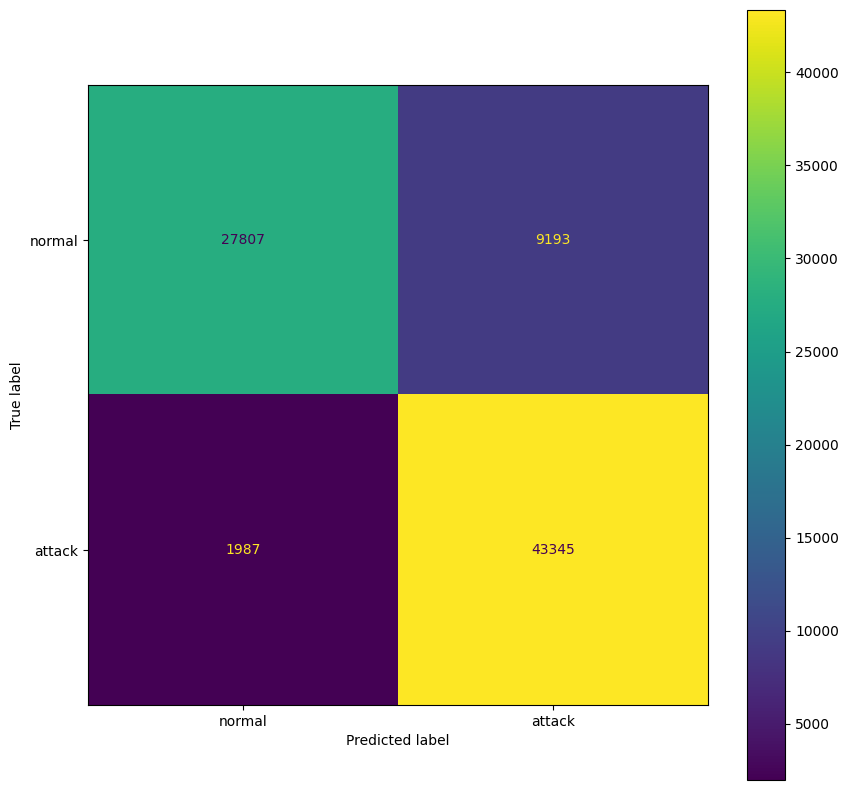

In [254]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

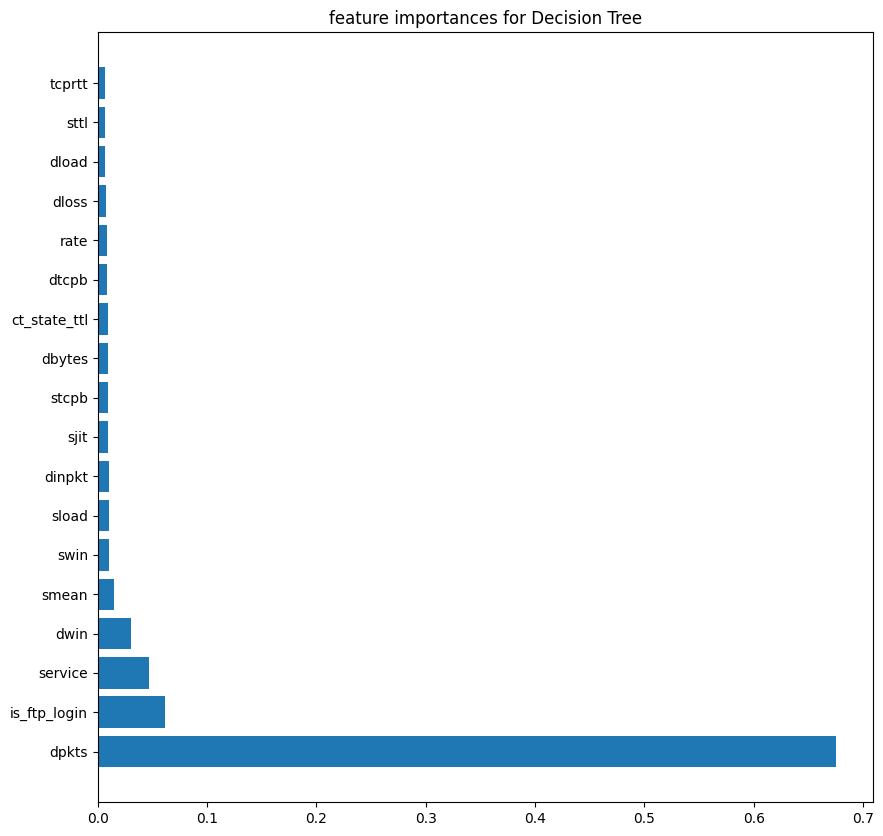

In [247]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['label'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.4583333333333333, 0.875, 'x[6] <= -1.005\ngini = 0.435\nsamples = 175341\nvalue = [56000, 119341]'),
 Text(0.25, 0.625, 'x[12] <= -0.005\ngini = 0.014\nsamples = 42689\nvalue = [42386, 303]'),
 Text(0.16666666666666666, 0.375, 'x[23] <= -0.465\ngini = 0.496\nsamples = 559\nvalue = [256, 303]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 251\nvalue = [251, 0]'),
 Text(0.25, 0.125, 'gini = 0.032\nsamples = 308\nvalue = [5.0, 303.0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 42130\nvalue = [42130, 0]'),
 Text(0.6666666666666666, 0.625, 'x[3] <= -0.176\ngini = 0.184\nsamples = 132652\nvalue = [13614.0, 119038.0]'),
 Text(0.5, 0.375, 'x[23] <= -0.43\ngini = 0.049\nsamples = 72529\nvalue = [1837, 70692]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.488\nsamples = 4169\nvalue = [1764, 2405]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.002\nsamples = 68360\nvalue = [73, 68287]'),
 Text(0.8333333333333334, 0.375, 'x[37] <= -0.15\ngini = 0.315\nsamples = 60

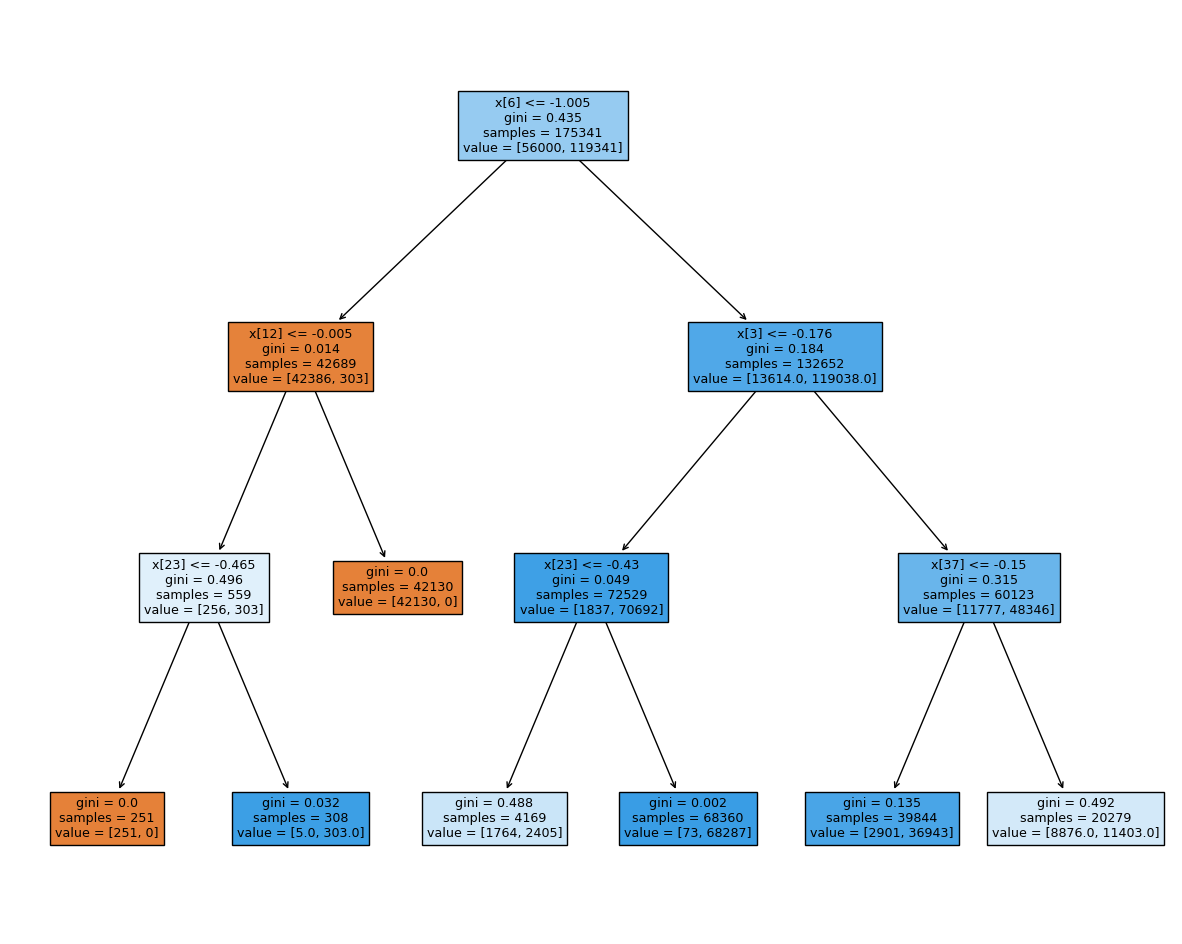

In [248]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

Training Accuracy RandomForestClassifier 99.81692815713382  Test Accuracy RandomForestClassifier 87.14594568333091
Training Precesion RandomForestClassifier 99.81834011418621  Test Precesion RandomForestClassifier 81.85351544596206
Training Recall RandomForestClassifier 99.91285476072767  Test Recall RandomForestClassifier 98.48892614488662


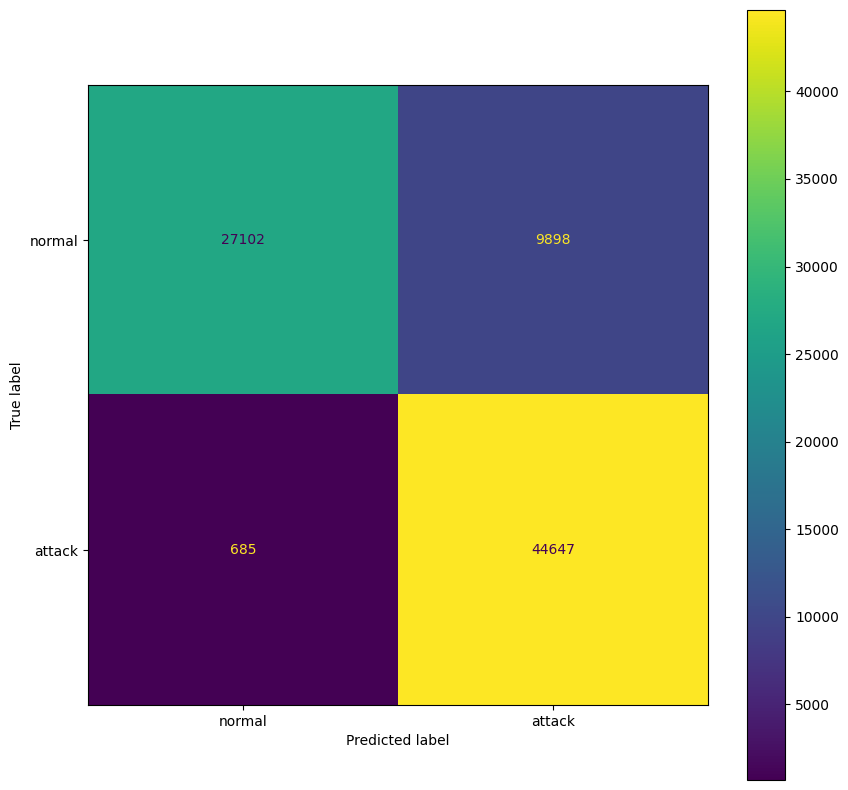

In [249]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

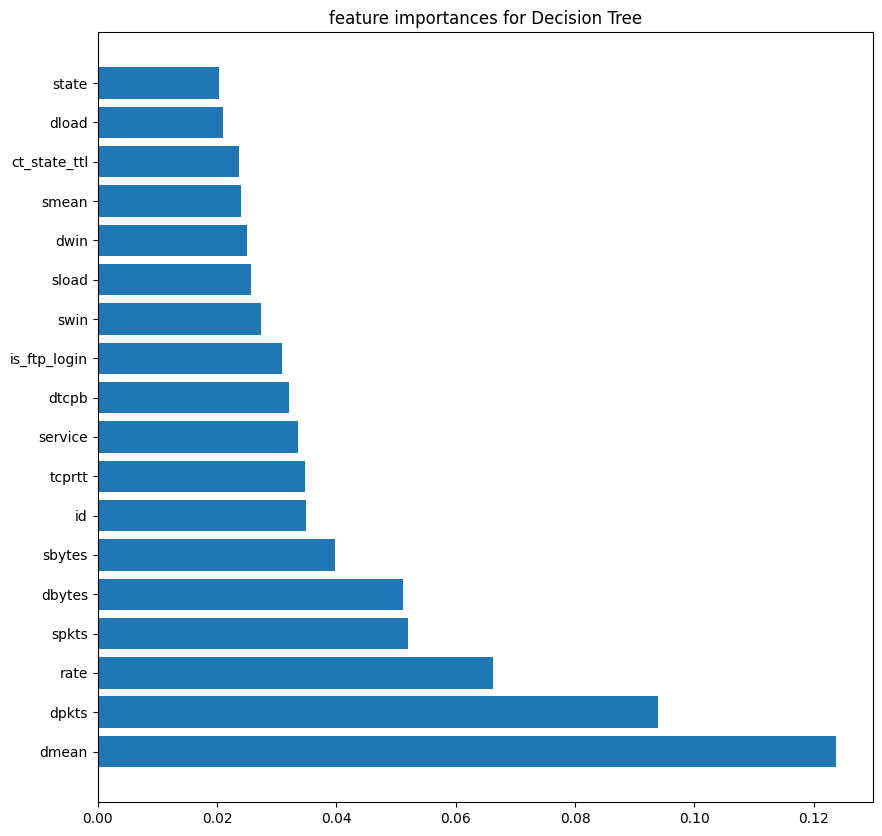

In [255]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [295]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_multi = encoder.fit_transform(data_train['attack_cat'])
y_test_multi = encoder.transform(data_test['attack_cat'])

In [305]:
#Building an XGBClassifier in order to predict threat 
xg_c = xgb.XGBClassifier(objective='multi:softmax', num_class=len(encoder.classes_),n_estimators = 20).fit(x_train, y_train_multi)

Train Accuracy:  0.8284
Test  Accuracy:  0.7689
Test  Macro F1:  0.5107
Test  Weighted F1: 0.7768

Classification Report:
                 precision    recall  f1-score   support

      Analysis     0.0300    0.0281    0.0290       677
      Backdoor     0.0522    0.0961    0.0677       583
           DoS     0.4262    0.0699    0.1202      4089
      Exploits     0.5736    0.8913    0.6980     11132
       Fuzzers     0.3086    0.5663    0.3995      6062
       Generic     0.9981    0.9695    0.9836     18871
        Normal     0.9612    0.7616    0.8499     37000
Reconnaissance     0.9214    0.8081    0.8610      3496
     Shellcode     0.3321    0.6878    0.4479       378
         Worms     0.7222    0.5909    0.6500        44

      accuracy                         0.7689     82332
     macro avg     0.5326    0.5470    0.5107     82332
  weighted avg     0.8238    0.7689    0.7768     82332



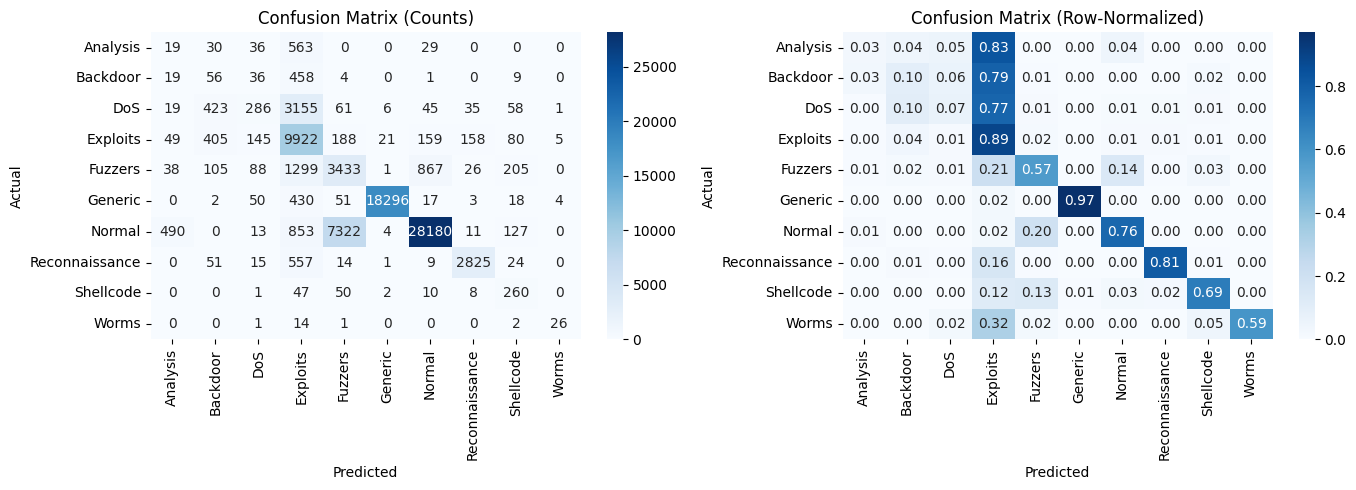

In [306]:
y_pred_tr = xg_c.predict(x_train)
y_pred_te = xg_c.predict(x_test)

# Scalar metrics
print(f"Train Accuracy:  {accuracy_score(y_train_multi, y_pred_tr):.4f}")
print(f"Test  Accuracy:  {accuracy_score(y_test_multi, y_pred_te):.4f}")
print(f"Test  Macro F1:  {f1_score(y_test_multi, y_pred_te, average='macro'):.4f}")
print(f"Test  Weighted F1: {f1_score(y_test_multi, y_pred_te, average='weighted'):.4f}\n")

# Detailed per-class report
print("Classification Report:\n", classification_report(y_test_multi, y_pred_te, target_names=encoder.classes_, digits=4))

# Confusion matrices
cm = confusion_matrix(y_test_multi, y_pred_te, labels=np.arange(len(encoder.classes_)))
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual'); axes[0].grid(False)

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix (Row-Normalized)')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual'); axes[1].grid(False)

plt.tight_layout()
plt.show()

Training Accuracy PCA RandomForest 99.81635783986633  Test Accuracy PCA RandomForest 85.59247923043289
Training Precesion PCA RandomForest 99.81750449960236  Test Precesion PCA RandomForest 80.52272561464945
Training Recall PCA RandomForest 99.91285476072767  Test Recall PCA RandomForest 97.39036442248302


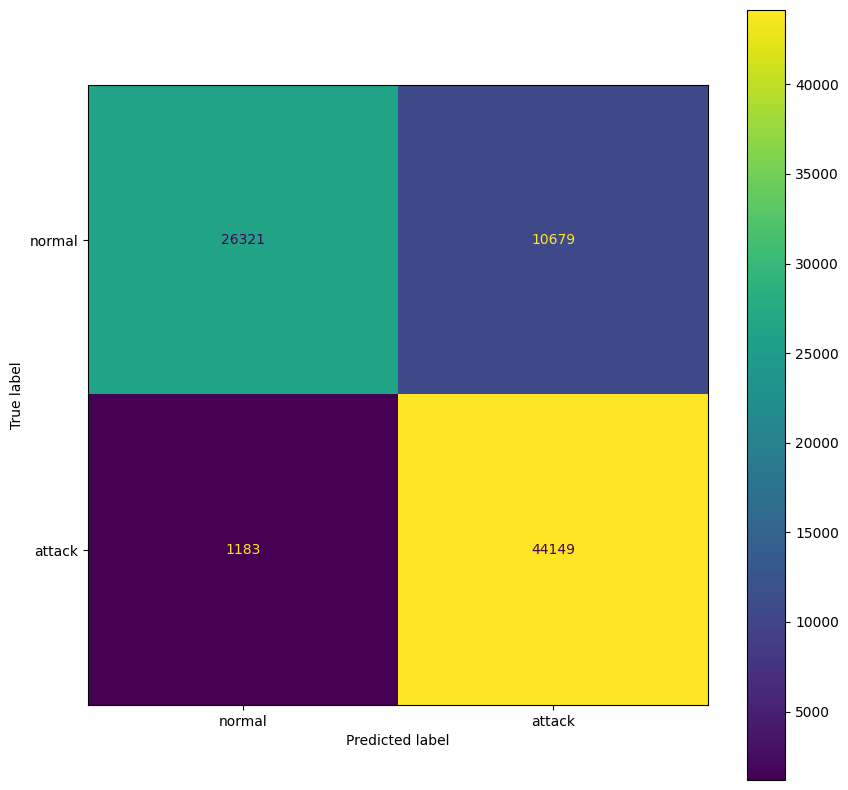

In [310]:
# Measuring effect of PCA
# PCA was already done in the preprocess par
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [331]:
# Neural networks (Binary: normal vs attack)

model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

model_b.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
             tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.AUC(name='aupr', curve='PR'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# class weights for imbalance
neg, pos = (y_train==0).sum(), (y_train==1).sum()
cw = {0: (len(y_train)/(2*neg)), 1: (len(y_train)/(2*pos))}

es = tf.keras.callbacks.EarlyStopping(monitor='val_aupr', mode='max', patience=6, restore_best_weights=True)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_aupr', mode='max', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

history_b = model.fit(
    x_train.astype('float32'), y_train.astype('int32'),
    validation_data=(x_test.astype('float32'), y_test.astype('int32')),
    epochs=20, batch_size=2048, class_weight=cw, callbacks=[es, rlr], verbose=1
)


Epoch 1/20
86/86 [==============================] - 5s 38ms/step - loss: 6427.3408 - accuracy: 0.7249 - auc: 0.7366 - aupr: 0.7947 - precision: 0.8171 - recall: 0.7677 - val_loss: 1441.4893 - val_accuracy: 0.7078 - val_auc: 0.8605 - val_aupr: 0.8920 - val_precision: 0.6602 - val_recall: 0.9668 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - 3s 33ms/step - loss: 2360.2761 - accuracy: 0.8489 - auc: 0.9032 - aupr: 0.9276 - precision: 0.8809 - recall: 0.8996 - val_loss: 678.6551 - val_accuracy: 0.7864 - val_auc: 0.9153 - val_aupr: 0.9376 - val_precision: 0.7448 - val_recall: 0.9312 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - 3s 34ms/step - loss: 1051.5155 - accuracy: 0.8792 - auc: 0.9409 - aupr: 0.9585 - precision: 0.9146 - recall: 0.9073 - val_loss: 315.9860 - val_accuracy: 0.8120 - val_auc: 0.9393 - val_aupr: 0.9542 - val_precision: 0.7651 - val_recall: 0.9504 - lr: 0.0010
Epoch 4/20
86/86 [==============================] - 3s 39ms/step - loss: 516.7

In [367]:
# Neural networks (Multiclass: attack_cat)  <-- same format, only last layer + loss differ

K = len(encoder.classes_)  # ensure you have LabelEncoder() fit on attack_cat to get y_train_multi / y_test_multi

model_mc = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=K, activation='softmax'),
])

model_mc.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

# class weights for multiclass imbalance
import numpy as np
counts = np.bincount(y_train_multi, minlength=K)
cw_mc = {c: (len(y_train_multi)/(K*counts[c])) for c in range(K)}

es = tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', mode='max', patience=8, restore_best_weights=True)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_sparse_categorical_accuracy', mode='max', factor=0.5, patience=3, min_lr=3e-5, verbose=1)

history_mc = model_mc.fit(
    x_train.astype('float32'), y_train_multi.astype('int32'),
    validation_data=(x_test.astype('float32'), y_test_multi.astype('int32')),
    epochs=30, batch_size=2048, class_weight=cw_mc, callbacks=[es, rlr], verbose=1
)


Epoch 1/30
86/86 [==============================] - 4s 40ms/step - loss: 9577.8477 - sparse_categorical_accuracy: 0.2342 - val_loss: 1924.9523 - val_sparse_categorical_accuracy: 0.4152 - lr: 0.0010
Epoch 2/30
86/86 [==============================] - 3s 40ms/step - loss: 3547.4233 - sparse_categorical_accuracy: 0.3244 - val_loss: 1070.5885 - val_sparse_categorical_accuracy: 0.4695 - lr: 0.0010
Epoch 3/30
86/86 [==============================] - 3s 37ms/step - loss: 1805.1222 - sparse_categorical_accuracy: 0.4608 - val_loss: 526.4360 - val_sparse_categorical_accuracy: 0.4844 - lr: 0.0010
Epoch 4/30
86/86 [==============================] - 3s 37ms/step - loss: 881.0221 - sparse_categorical_accuracy: 0.5077 - val_loss: 274.0731 - val_sparse_categorical_accuracy: 0.4610 - lr: 0.0010
Epoch 5/30
86/86 [==============================] - 3s 36ms/step - loss: 421.7703 - sparse_categorical_accuracy: 0.5019 - val_loss: 121.2505 - val_sparse_categorical_accuracy: 0.4624 - lr: 0.0010
Epoch 6/30
85/8

In [368]:
model_b.summary()
model_mc.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                12480     
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 512)               66048     
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 128)              

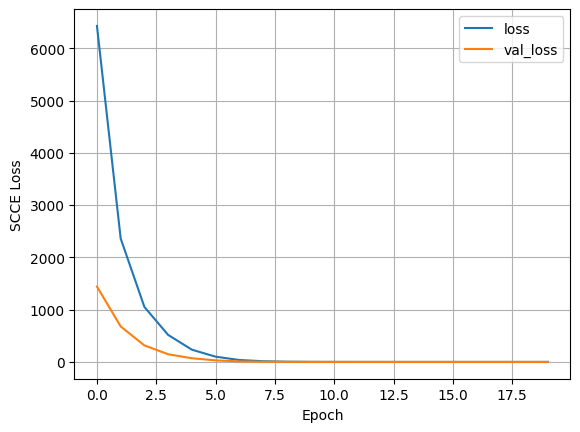

In [369]:
plt.plot(history_b.history['loss'], label='loss')
plt.plot(history_b.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

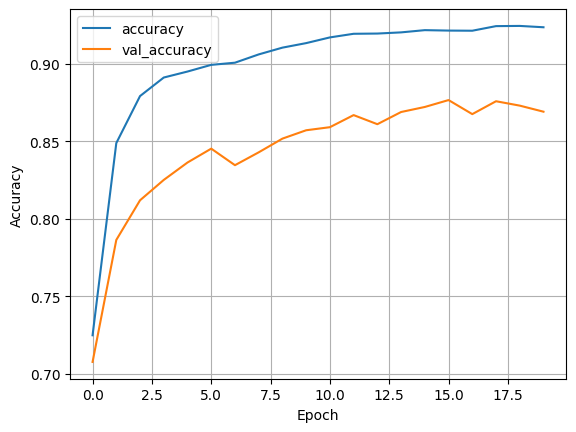

In [370]:
plt.plot(history_b.history['accuracy'], label='accuracy')
plt.plot(history_b.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

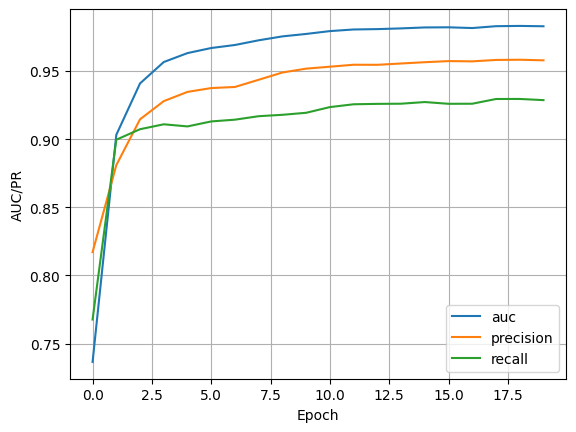

In [371]:
plt.plot(history_b.history['auc'], label='auc')
plt.plot(history_b.history['precision'], label='precision')
plt.plot(history_b.history['recall'], label='recall')
plt.xlabel('Epoch')
plt.ylabel('AUC/PR')
plt.legend()
plt.grid(True)

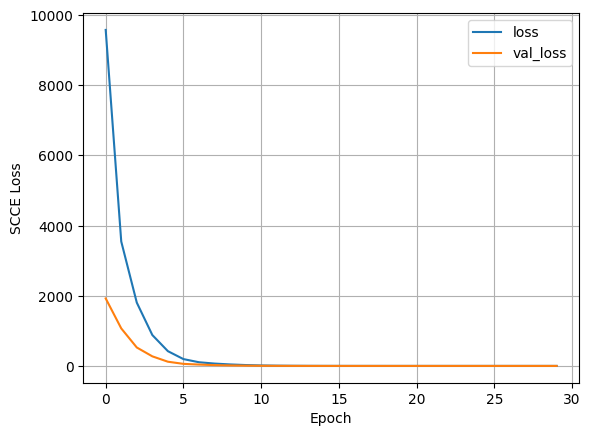

In [372]:
plt.plot(history_mc.history['loss'], label='loss')
plt.plot(history_mc.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

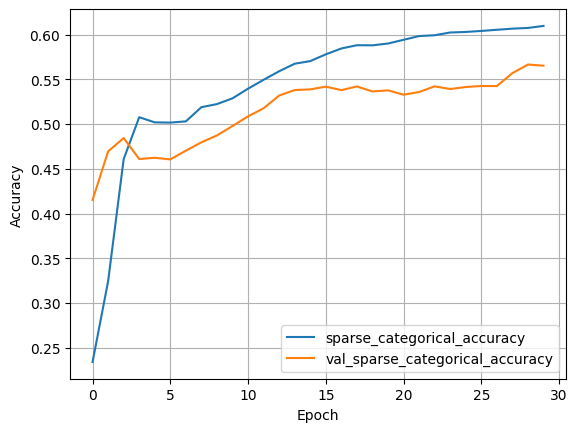

In [373]:
plt.plot(history_mc.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history_mc.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

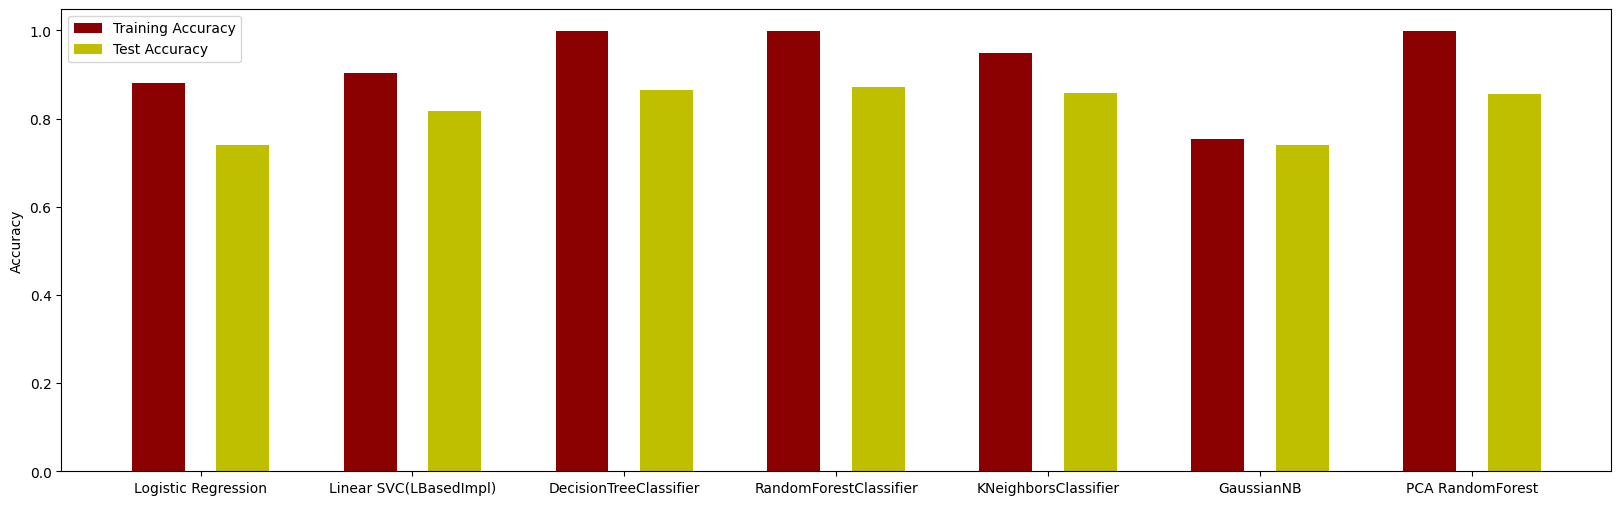

In [374]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

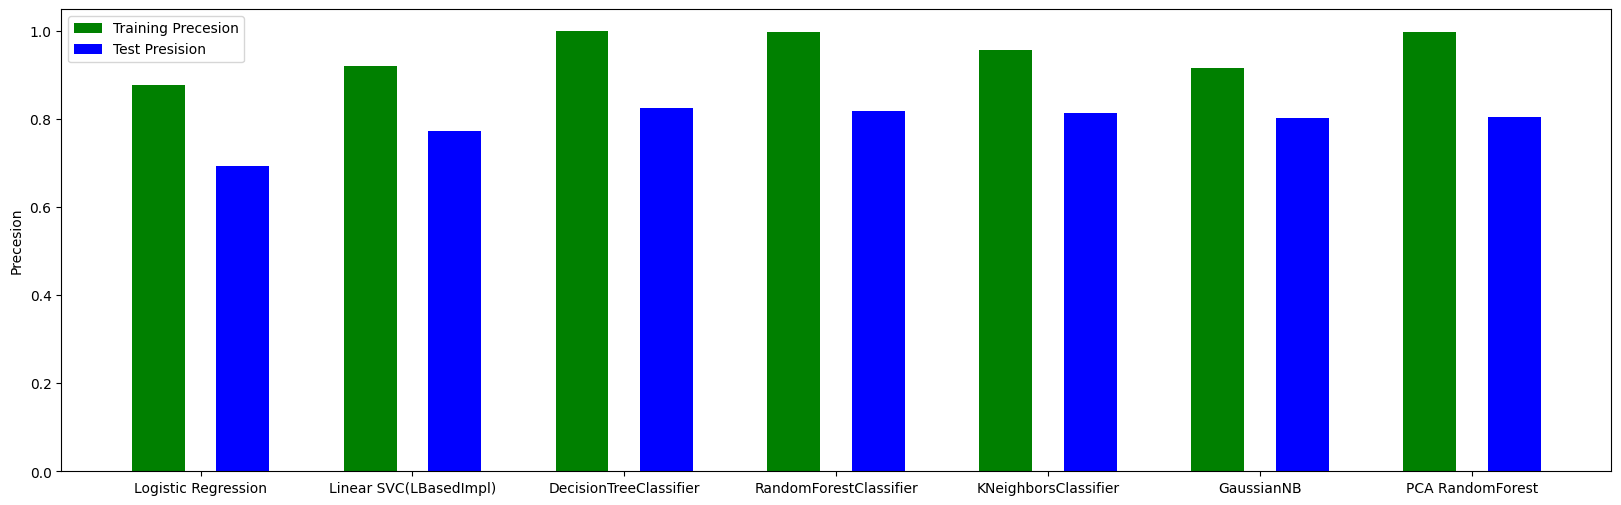

In [375]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

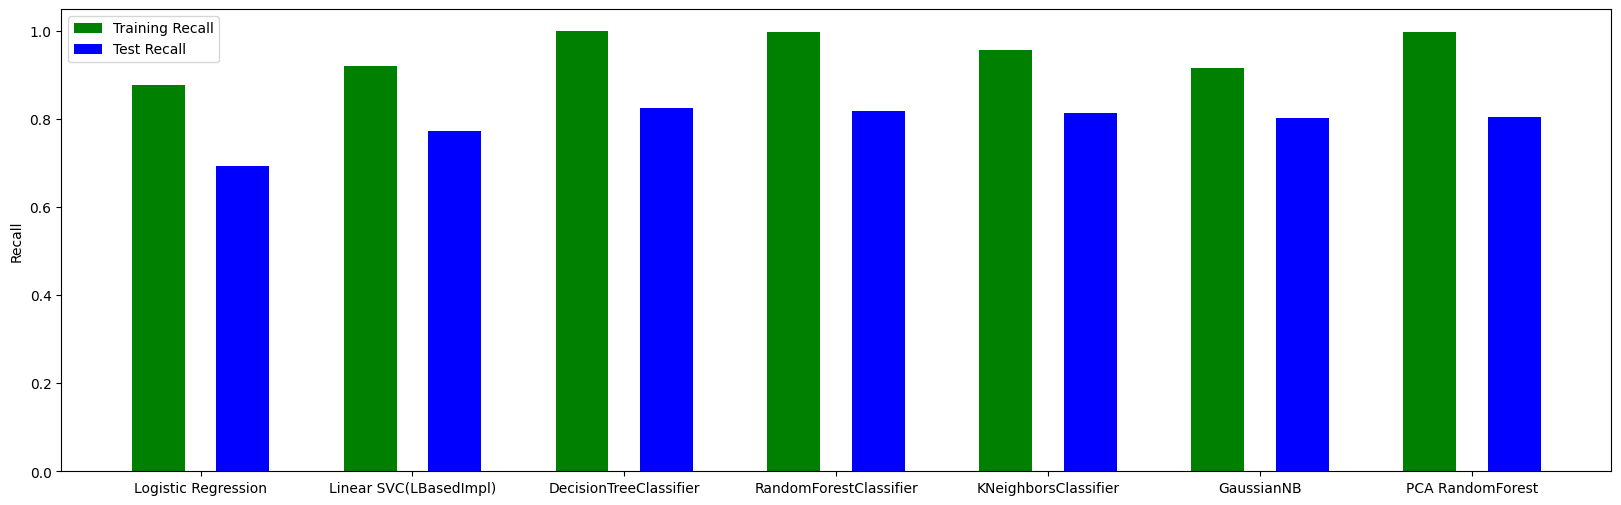

In [376]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()